In [1]:
import pandas as pd
from feature_selector import FeatureSelector

In [2]:
train = pd.read_hdf('../input/user_features.h5')

train = train[train.label.notna()]
test = train[train.label.isna()]

train.shape, test.shape

((6106, 85), (0, 85))

In [3]:
train_labels = train['label']
train.head()

,phone_no_m,city_name,county_name,idcard_cnt,label,arpu_202004,city_name_county_name,idcard_cnt*arpu_202004,arpu_202004/idcard_cnt,city_name_idcard_cnt_max,...,city_name_county_name_arpu_202004/idcard_cnt_max,city_name_county_name_arpu_202004/idcard_cnt_min,city_name_county_name_arpu_202004/idcard_cnt_median,city_name_county_name_arpu_202004/idcard_cnt_mean,city_name_county_name_arpu_202004/idcard_cnt_skew,city_name_county_name_arpu_202004/idcard_cnt_nunique,city_name_count,county_name_count,city_name_county_name_count,idcard_cnt_count
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a...,16,97,1,0.0,45.000000,141,45.00000,44.995500,5,...,60000.000000,0.333322,24.599726,606.375977,10.294616,91,0.080726,0.016685,0.016685,0.463133
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34d...,10,82,1,0.0,60.000000,80,60.00000,59.994001,5,...,114.869257,0.333322,13.468301,22.458818,1.735547,43,0.029935,0.006625,0.006625,0.463133
2,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c...,11,160,2,0.0,63.000000,101,126.00000,31.498425,7,...,257.474253,0.333322,24.498775,36.008967,3.320340,68,0.375537,0.008956,0.008956,0.249295
3,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f...,11,181,2,0.0,23.203125,106,46.40625,11.600982,7,...,231.488426,0.249994,22.588975,35.978017,2.016172,114,0.375537,0.026868,0.018771,0.249295
4,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d...,10,82,1,0.0,50.000000,80,50.00000,49.995000,5,...,114.869257,0.333322,13.468301,22.458818,1.735547,43,0.029935,0.006625,0.006625,0.463133


In [4]:
train = train.drop(['phone_no_m', 'label'], axis=1)

In [5]:
fs = FeatureSelector(data=train, labels=train_labels)

In [6]:
fs.identify_missing(missing_threshold=0.9)
missing_features = fs.ops['missing']
missing_features

6 features with greater than 0.90 missing values.



['city_name_arpu_202004_skew',
 'city_name_idcard_cnt*arpu_202004_skew',
 'county_name_arpu_202004_skew',
 'county_name_idcard_cnt*arpu_202004_skew',
 'city_name_county_name_arpu_202004_skew',
 'city_name_county_name_idcard_cnt*arpu_202004_skew']

In [7]:
train.drop(missing_features, axis=1, inplace=True)

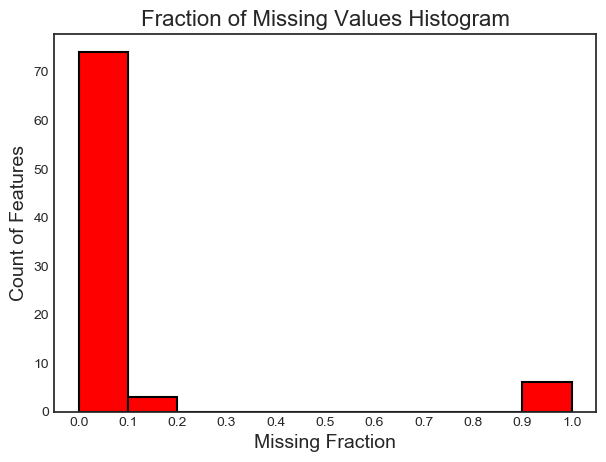

In [8]:
fs.plot_missing()

In [9]:
fs.missing_stats.head(10)

,missing_fraction
city_name_idcard_cnt*arpu_202004_skew,1.000000
city_name_arpu_202004_skew,1.000000
city_name_county_name_idcard_cnt*arpu_202004_skew,0.991320
county_name_idcard_cnt*arpu_202004_skew,0.991320
county_name_arpu_202004_skew,0.910907
city_name_county_name_arpu_202004_skew,0.910907
arpu_202004,0.120701
idcard_cnt*arpu_202004,0.120701
arpu_202004/idcard_cnt,0.120701
city_name_county_name_arpu_202004/idcard_cnt_skew,0.004749


In [10]:
fs.identify_single_unique()

0 features with a single unique value.



In [11]:
single_unique = fs.ops['single_unique']
single_unique

[]

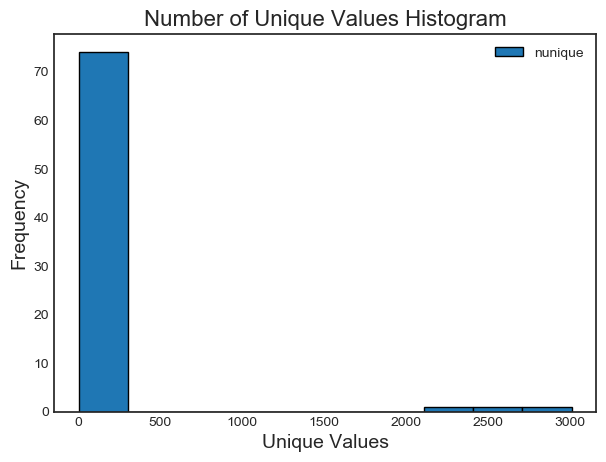

In [12]:
fs.plot_unique()

In [13]:
fs.unique_stats.sample(5)

,nunique
county_name_idcard_cnt_skew,159
city_name_county_name_arpu_202004/idcard_cnt_max,176
city_name_idcard_cnt*arpu_202004_mean,23
county_name_arpu_202004_min,61
city_name_county_name_arpu_202004_max,173


In [14]:
fs.identify_collinear(correlation_threshold=0.975)

27 features with a correlation magnitude greater than 0.97.



In [15]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['city_name_county_name',
 'city_name_idcard_cnt*arpu_202004_nunique',
 'city_name_arpu_202004/idcard_cnt_min',
 'city_name_arpu_202004/idcard_cnt_nunique',
 'county_name_idcard_cnt*arpu_202004_nunique']

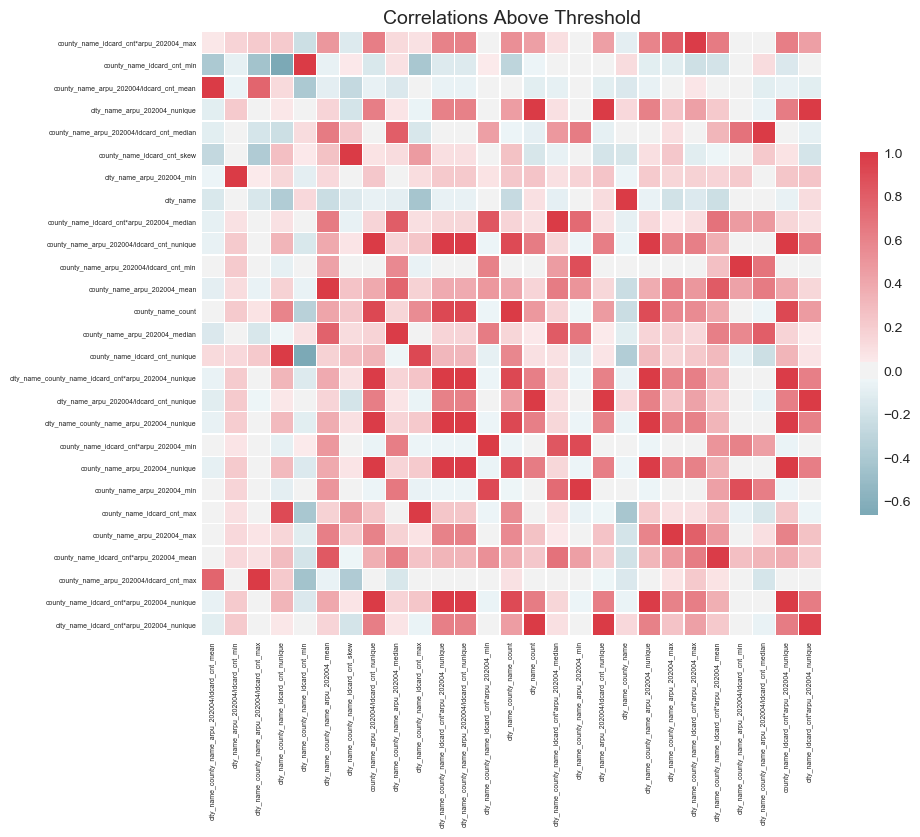

In [16]:
fs.plot_collinear()

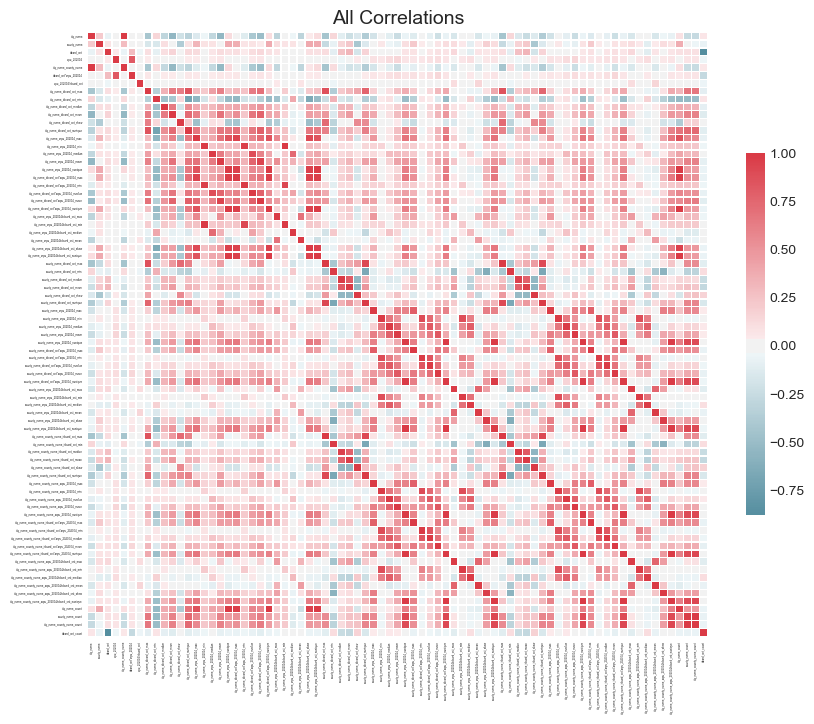

In [17]:
fs.plot_collinear(plot_all=True)

27 features with a correlation magnitude greater than 0.98.



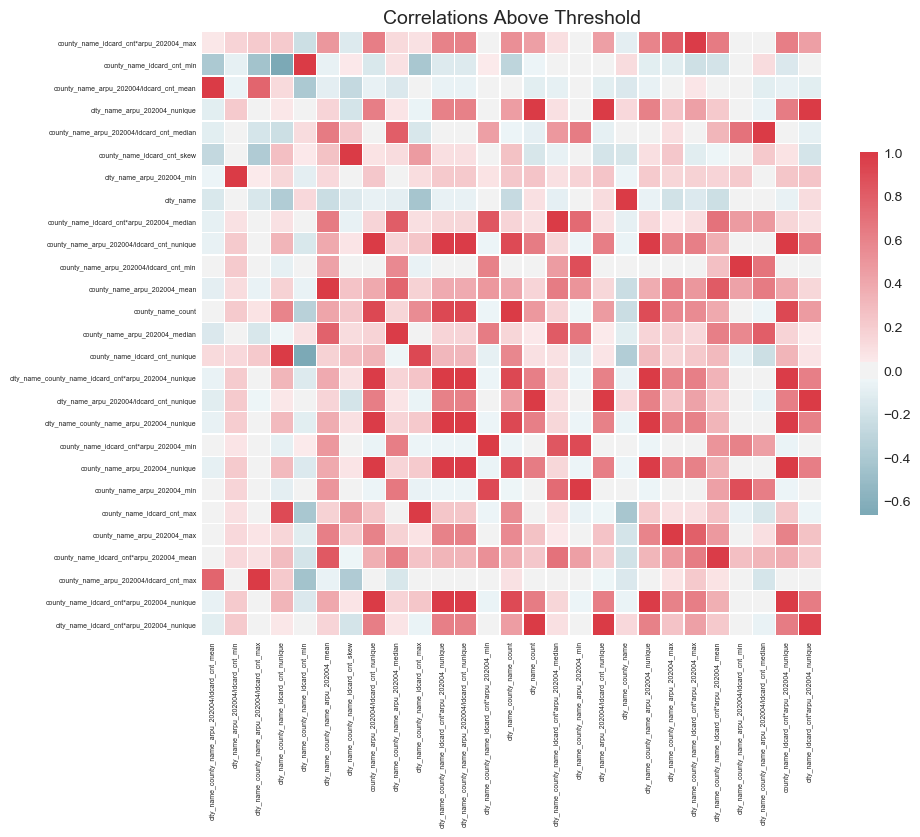

In [18]:
fs.identify_collinear(correlation_threshold=0.98)
fs.plot_collinear()

In [19]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,city_name_county_name,city_name,0.993237
1,city_name_idcard_cnt*arpu_202004_nunique,city_name_arpu_202004_nunique,0.999981
2,city_name_arpu_202004/idcard_cnt_min,city_name_arpu_202004_min,0.988776
3,city_name_arpu_202004/idcard_cnt_nunique,city_name_arpu_202004_nunique,0.999873
4,city_name_arpu_202004/idcard_cnt_nunique,city_name_idcard_cnt*arpu_202004_nunique,0.999924


In [20]:
fs.identify_zero_importance(task='classification',
                            eval_metric='auc', 
                            n_iterations=10,
                            early_stopping=True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.89035	valid_0's binary_logloss: 0.34622
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.880181	valid_0's binary_logloss: 0.382179
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.868528	valid_0's binary_logloss: 0.361729
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.881401	valid_0's binary_logloss: 0.363765
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.882858	valid_0's binary_logloss: 0.402039
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.881201	valid_0's binary_logloss: 0.357046
T

In [21]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 83 original features
There are 0 one-hot features


In [22]:
fs.data_all.head(10)

,city_name,county_name,idcard_cnt,arpu_202004,city_name_county_name,idcard_cnt*arpu_202004,arpu_202004/idcard_cnt,city_name_idcard_cnt_max,city_name_idcard_cnt_min,city_name_idcard_cnt_median,...,city_name_county_name_arpu_202004/idcard_cnt_max,city_name_county_name_arpu_202004/idcard_cnt_min,city_name_county_name_arpu_202004/idcard_cnt_median,city_name_county_name_arpu_202004/idcard_cnt_mean,city_name_county_name_arpu_202004/idcard_cnt_skew,city_name_county_name_arpu_202004/idcard_cnt_nunique,city_name_count,county_name_count,city_name_county_name_count,idcard_cnt_count
0,16,97,1,45.000000,141,45.000000,44.995500,5,0,2,...,60000.000000,0.333322,24.599726,606.375977,10.294616,91,0.080726,0.016685,0.016685,0.463133
1,10,82,1,60.000000,80,60.000000,59.994001,5,0,2,...,114.869257,0.333322,13.468301,22.458818,1.735547,43,0.029935,0.006625,0.006625,0.463133
2,11,160,2,63.000000,101,126.000000,31.498425,7,0,2,...,257.474253,0.333322,24.498775,36.008967,3.320340,68,0.375537,0.008956,0.008956,0.249295
3,11,181,2,23.203125,106,46.406250,11.600982,7,0,2,...,231.488426,0.249994,22.588975,35.978017,2.016172,114,0.375537,0.026868,0.018771,0.249295
4,10,82,1,50.000000,80,50.000000,49.995000,5,0,2,...,114.869257,0.333322,13.468301,22.458818,1.735547,43,0.029935,0.006625,0.006625,0.463133
5,19,53,2,59.656250,160,119.312500,29.826634,5,1,1,...,160.983902,0.999900,30.090741,41.407583,1.346641,69,0.044902,0.008711,0.008711,0.249295
6,11,157,1,NaN,99,NaN,NaN,7,0,2,...,390000.000000,0.219917,23.997600,3016.240342,11.445491,112,0.375537,0.021224,0.021224,0.463133
7,1,111,4,NaN,10,NaN,NaN,5,1,1,...,1242.875712,0.499975,14.030782,70.424899,5.109142,31,0.034352,0.005030,0.005030,0.075696
8,10,128,2,16.218750,82,32.437500,8.108970,5,0,2,...,17001.953125,0.499975,13.600202,5181.684517,0.910937,16,0.029935,0.002822,0.002822,0.249295
9,11,30,2,14.632812,83,29.265625,7.316040,7,0,2,...,159.234077,0.249994,41.746938,45.714591,1.050542,36,0.375537,0.015949,0.004417,0.249295


In [23]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features

['city_name_county_name_idcard_cnt_min']

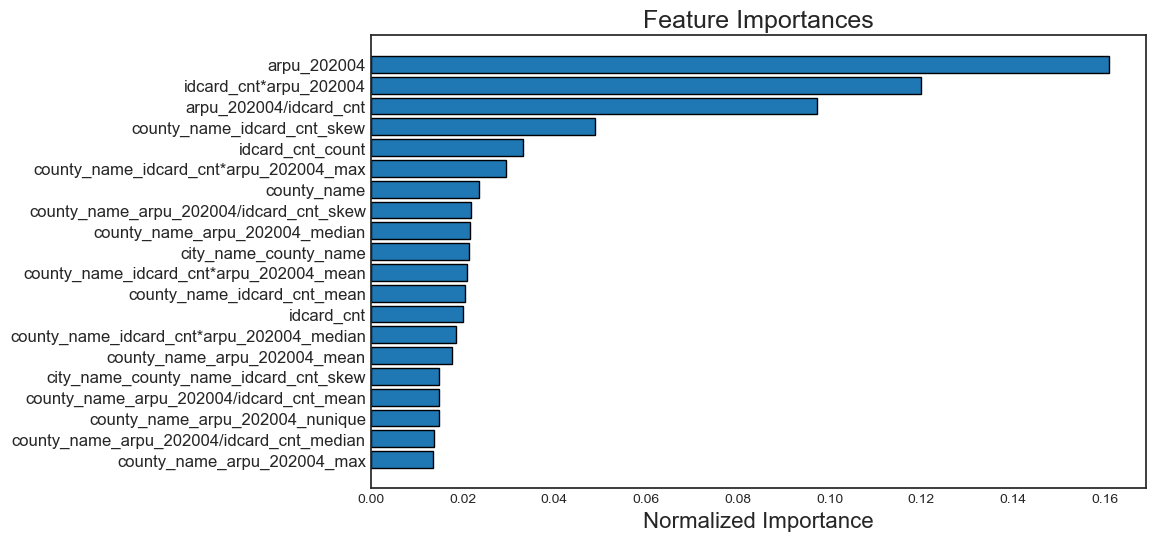

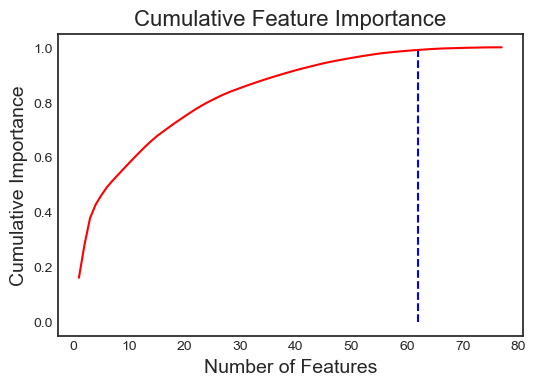

62 features required for 0.99 of cumulative importance


In [24]:
fs.plot_feature_importances(threshold=0.99,
                            plot_n=20)

In [26]:
fs.feature_importances.head(20)

,feature,importance,normalized_importance,cumulative_importance
0,arpu_202004,251.9,0.160856,0.160856
1,idcard_cnt*arpu_202004,187.8,0.119923,0.280779
2,arpu_202004/idcard_cnt,152.3,0.097254,0.378033
3,county_name_idcard_cnt_skew,76.6,0.048914,0.426948
4,idcard_cnt_count,52.0,0.033206,0.460153
5,county_name_idcard_cnt*arpu_202004_max,46.2,0.029502,0.489655
6,county_name,36.9,0.023563,0.513218
7,county_name_arpu_202004/idcard_cnt_skew,34.1,0.021775,0.534994
8,county_name_arpu_202004_median,34.0,0.021711,0.556705
9,city_name_county_name,33.7,0.021520,0.578225


In [27]:
one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
len(one_hundred_features)

77

In [28]:
fs.identify_low_importance(cumulative_importance = 0.99)

61 features required for cumulative importance of 0.99 after one hot encoding.
16 features do not contribute to cumulative importance of 0.99.



In [29]:
low_importance_features = fs.ops['low_importance']
low_importance_features

['city_name_county_name_arpu_202004_min',
 'city_name_county_name_idcard_cnt*arpu_202004_min',
 'city_name_arpu_202004_min',
 'city_name_idcard_cnt*arpu_202004_nunique',
 'city_name_county_name_idcard_cnt*arpu_202004_nunique',
 'city_name_idcard_cnt_median',
 'city_name_county_name_idcard_cnt_max',
 'city_name_idcard_cnt*arpu_202004_min',
 'county_name_arpu_202004/idcard_cnt_nunique',
 'city_name_idcard_cnt_max',
 'county_name_idcard_cnt_min',
 'city_name_idcard_cnt_min',
 'city_name_idcard_cnt_nunique',
 'city_name_county_name_arpu_202004/idcard_cnt_nunique',
 'city_name_arpu_202004/idcard_cnt_nunique',
 'city_name_county_name_idcard_cnt_min']

In [30]:
train_no_missing = fs.remove(methods = ['missing'])

KeyError: "['county_name_arpu_202004_skew' 'county_name_idcard_cnt*arpu_202004_skew'\n 'city_name_county_name_arpu_202004_skew'\n 'city_name_idcard_cnt*arpu_202004_skew'\n 'city_name_county_name_idcard_cnt*arpu_202004_skew'\n 'city_name_arpu_202004_skew'] not found in axis"

In [31]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run



KeyError: "['county_name_idcard_cnt*arpu_202004_skew'\n 'city_name_county_name_idcard_cnt*arpu_202004_skew'\n 'city_name_arpu_202004_skew' 'county_name_arpu_202004_skew'\n 'city_name_idcard_cnt*arpu_202004_skew'\n 'city_name_county_name_arpu_202004_skew'] not found in axis"

In [32]:
fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

27 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.881368	valid_0's binary_logloss: 0.358107
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[96]	valid_0's auc: 0.874128	valid_0's binary_logloss: 0.368078
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.86122	valid_0's binary_logloss: 0.379603
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.865693	valid_0's binary_logloss: 0.379188
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.889314	valid_0's binary_logloss: 0.346452
Training 